In [1]:
# importing libraries
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates
import numpy as np

In [2]:
# loading the dataset
temp = temp = pd.read_csv('temperature.csv', index_col='datetime', parse_dates=['datetime'])


In [3]:
# subsetting New York data from the temperature dataset
new_york = pd.DataFrame(temp['New York'])

In [4]:
new_york.head()

,New York
datetime,
2012-10-01 12:00:00,NaN
2012-10-01 13:00:00,288.220000
2012-10-01 14:00:00,288.247676
2012-10-01 15:00:00,288.326940
2012-10-01 16:00:00,288.406203


In [5]:
# renaming the column from 'new york' to 'temperature'
new_york.rename({'New York':'Temperature'}, axis=1, inplace=True)

In [6]:
new_york.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45253 entries, 2012-10-01 12:00:00 to 2017-11-30 00:00:00
Data columns (total 1 columns):
Temperature    44460 non-null float64
dtypes: float64(1)
memory usage: 707.1 KB


In [7]:
# getting the total null values
new_york.isnull().sum()

Temperature    793
dtype: int64

In [8]:
# filling the missing values with a forward fill and a backward fill
new_york.fillna(method='ffill', inplace=True)

In [9]:
new_york.fillna(method='bfill', inplace=True)

In [10]:
new_york.isnull().sum()

Temperature    0
dtype: int64

In [11]:
# this bit converts the temperature unit from absolute kelvin to celsius
new_york = new_york.apply(round)-273.15


In [12]:
new_york.head()

,Temperature
datetime,
2012-10-01 12:00:00,14.85
2012-10-01 13:00:00,14.85
2012-10-01 14:00:00,14.85
2012-10-01 15:00:00,14.85
2012-10-01 16:00:00,14.85


Text(0.5,1,'New York Temperature from 2012 to 2017')

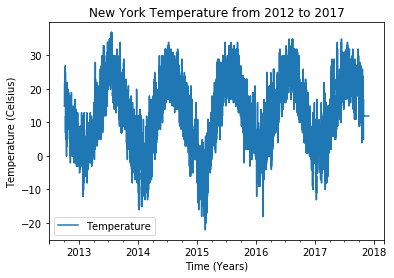

In [36]:
# plotting the temperature data of new york city
new_york.plot()

plt.xlabel('Time (Years)')
plt.ylabel('Temperature (Celsius)')
plt.title('New York Temperature from 2012 to 2017')

A dip in the temperature was observed in 2015 and further inquiry into that peculiar year was conducted

Text(0.5,1,'New York Temperature in 2015')

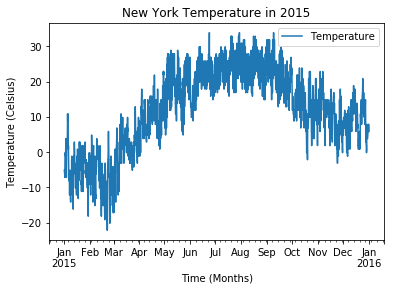

In [39]:
# plotting the new york temperature data for 2015
new_york['2015-01-01':'2015-12-31'].plot()
plt.xlabel('Time (Months)')
plt.ylabel('Temperature (Celsius)')
plt.title('New York Temperature in 2015')

The above plot shows that the lowest temperature was between Feb and March

Text(0.5,1,'New York Temperature Between Feb and March 2015')

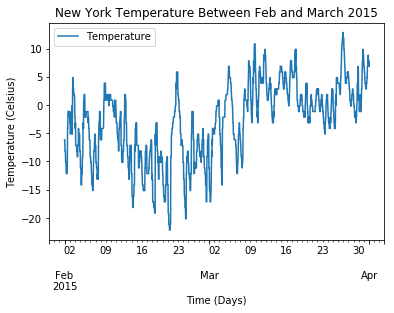

In [40]:
#plotting the temperature data for feb and march 2015
#the drop in the temperature occurred in late feb and an constant rise quickly followed
new_york['2015-02-01':'2015-03-31'].plot()
plt.xlabel('Time (Days)')
plt.ylabel('Temperature (Celsius)')
plt.title('New York Temperature Between Feb and March 2015')

We can observe that the lowest temperatures in the dataset was observed between Feb and March of 2015, but the overall temperature trend was an upward one.

In [16]:
# this bit of code resamples the dataset monthly 
monthly = new_york.resample('M')

In [17]:
# here, the mean of each month from 2012 to 2017 was calculated and visualized in a graph
monthly_mean = monthly.mean()

Text(0.5,1,'Mean Monthly Temperature of New York')

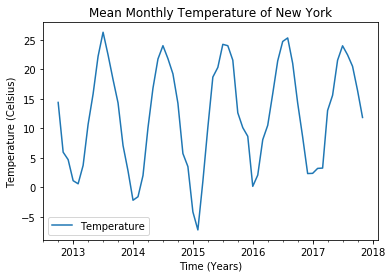

In [41]:
# we can observe a rise in the temperature from 2015 to 2017
monthly_mean.plot()
plt.xlabel('Time (Years)')
plt.ylabel('Temperature (Celsius)')
plt.title('Mean Monthly Temperature of New York')

In [19]:
# here, the data set is resampled yearly and the mean value for each year is plotted
yearly_mean = new_york.resample('Y').mean()

Text(0.5,1,'Mean Yearly Temperature of New York')

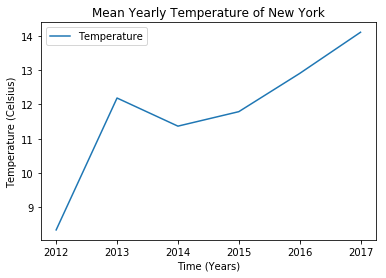

In [42]:
# there is an uptrend in the average temp of new york city as time progresses
yearly_mean.plot()
plt.xlabel('Time (Years)')
plt.ylabel('Temperature (Celsius)')
plt.title('Mean Yearly Temperature of New York')

Text(0.5,1,'Maximum Yearly Temperature of New York')

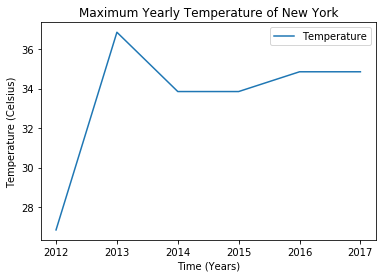

In [43]:
# to fully understand the trend, the yearly maximum temperature values were plotted and
# a steady upward trend is observed
yearly_max = new_york.resample('Y').max()

yearly_max.plot()
plt.xlabel('Time (Years)')
plt.ylabel('Temperature (Celsius)')
plt.title('Maximum Yearly Temperature of New York')

In [31]:
# finally, to confirm the trend, the yearly minimum temperature values for new york city was plotted
# we can observe that the cold months steadily got colder but this quickly changed in 2015 and an upward trend began
yearly_min = new_york.resample('Y').min()

Text(0.5,1,'Yearly Minimum Temperature of New York')

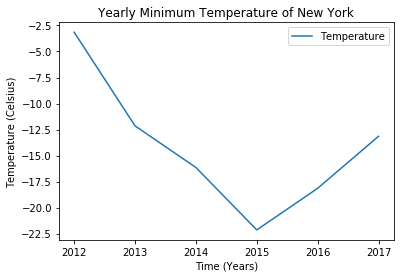

In [44]:
yearly_min.plot()
plt.xlabel('Time (Years)')
plt.ylabel('Temperature (Celsius)')
plt.title('Yearly Minimum Temperature of New York')

This trend confirms the report released by NASA in 2016. Earth's surface temperatures were the warmest since modern record keeping began in 1880.